Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/home/ljm/anaconda3/envs/jxtnett/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


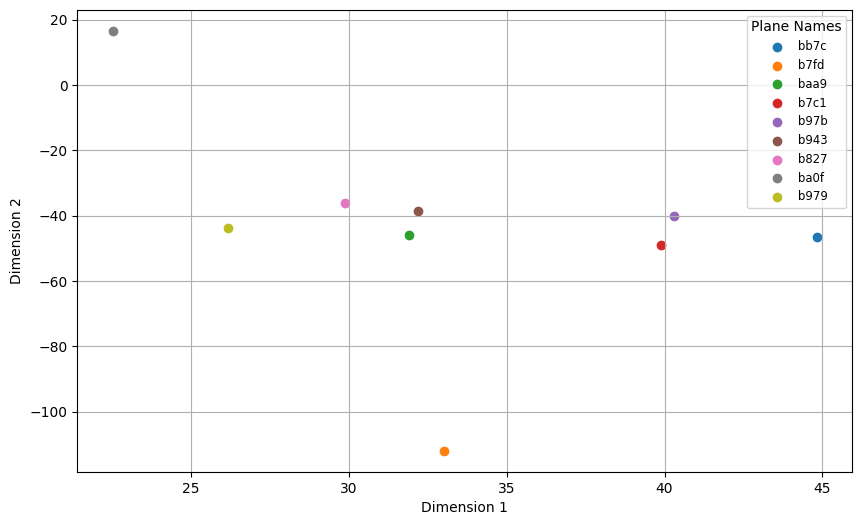

In [1]:
import open3d as o3d
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

def load_obj(file_path):
    mesh = o3d.io.read_triangle_mesh(file_path)
    return mesh

def sample_and_extract_features(mesh, num_points=1024):
    # 设置 open3d 的随机种子（如果支持）
    # 注意：open3d 的采样函数可能不支持设置随机种子，因此需要确保输入数据是固定的
    sampled_mesh = mesh.sample_points_uniformly(number_of_points=num_points)
    points = np.asarray(sampled_mesh.points)
    return points.flatten()

# 设置随机种子
seed = 19
np.random.seed(seed)  # 设置 numpy 的随机种子

# # 指定目录
# directory = '/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/ref/planes9'
# # # directory = '/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/planes'
# obj_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.obj')]
# plane_names = [os.path.basename(f)[:4] for f in obj_files]

# # 提取每个模型的特征向量
# features = []
# for file in obj_files:
#     mesh = load_obj(file)
#     feature_vector = sample_and_extract_features(mesh, num_points=1024)
#     features.append(feature_vector)

# feature_matrix = np.array(features)
# np.save(f'/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/output/PCA/tSNE2/{seed}t-SNE_feature_matrix.npy', feature_matrix)
feature_matrix = np.load(f'/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/output/PCA/tSNE2/sweepseed/19t-SNE.npy')
plane_names=['bb7c', 'b7fd', 'baa9', 'b7c1', 'b97b', 'b943', 'b827', 'ba0f', 'b979']

# 使用PCA将特征向量降维到50维
pca = PCA(n_components=8, random_state=seed)  # 设置 PCA 的随机种子
pca_features = pca.fit_transform(feature_matrix)

# 定义参数范围
perplexities = [5]
early_exaggerations = [36.0]
learning_rates = [100]
n_iters = [2000]
inits = ['pca']
angles = [0.8]

# 遍历参数组合
for perplexity in perplexities:
    for early_exaggeration in early_exaggerations:
        for learning_rate in learning_rates:
            for n_iter in n_iters:
                for init in inits:
                    for angle in angles:
                        tsne = TSNE(
                            n_components=2,
                            perplexity=perplexity,
                            early_exaggeration=early_exaggeration,
                            learning_rate=learning_rate,
                            n_iter=n_iter,
                            init=init,
                            angle=angle,
                            random_state=seed  # 设置 t-SNE 的随机种子
                        )
                        tsne_results = tsne.fit_transform(pca_features)

                        # 绘制结果
                        plt.figure(figsize=(10, 6))
                        for i, name in enumerate(plane_names):
                            plt.scatter(tsne_results[i, 0], tsne_results[i, 1], label=name)
                        # plt.title(f't-SNE Visualization (seed={seed}, perplexity={perplexity}, early_exaggeration={early_exaggeration}, learning_rate={learning_rate}, n_iter={n_iter}, init={init}, angle={angle})')
                        plt.xlabel('Dimension 1')
                        plt.ylabel('Dimension 2')
                        plt.grid(True)
                        plt.legend(title="Plane Names", loc='best', fontsize='small')
                        # plt.savefig(f'/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/output/PCA/tSNE2/{seed}t-SNE_pp{perplexity}_ee{early_exaggeration}_lr{learning_rate}_ni{n_iter}_init{init}_angle{angle}.png')
                        plt.savefig(f'/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/output/PCA/tSNE2/t-SNEs.png')
                        plt.show()

In [59]:
print(plane_names)

['bb7c', 'b7fd', 'baa9', 'b7c1', 'b97b', 'b943', 'b8ed', 'ba0f', 'b979']
